# Installing Needed Tools

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Tools

In [2]:
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import matplotlib.pyplot as plt # for plotting
import cv2 # computer vision from extracting features from images
import seaborn as sns # enchancement of plotting 
import math # uses for log operations to prevent underflow when calculating very small %'s
sns.set_style("darkgrid")

## Dataset
Load the spreadsheet for feature extraction with computer vision.

In [3]:
spreadsheet_data = pd.read_csv("birds.csv") # load the dataset
spreadsheet_data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision & Features
The spreadsheet does not directly contains the features, rather the filepaths for the images. Before we can use Naive Bayes we need to use convert these images to usable data format in python.

In [4]:

# Get a reduced size image's array of the pixel data into a dataframe to easily relate it to it's 'label'
def load_resize_flatten_images(df, target_size=(28, 28)):    
    # convert data format to feature vectors
    images, labels = [],[]
    data = {'image':[],'label':[], 'class':[], 'data set':[], 'class no':[]}
    for index, row in df.iterrows():
        # extractp pixel data from the image at the file path
        image = cv2.imread(row['filepaths'])
        # gray scale to reduce data size while retaining most data as colors well be stored as intenisity
        grayscaledImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # resize image to smaller dimensions make data more managable
        resizedImage = cv2.resize(grayscaledImage,target_size)
        resizedImage = resizedImage / 255
        # flatten into a 1D array
        imageArray = resizedImage.flatten()
        data['image'].append(imageArray)
        # use the filepath as an identifer to label the image data
        data['label'].append(row['filepaths'])
        # inded class from 0 to len(class) for confusion matrix and f1score methods from skitlearn later.
        match row['labels']:
            case 'ASIAN GREEN BEE EATER':
                data['class no'].append(0)
            case 'D-ARNAUDS BARBET':
                data['class no'].append(1)
            case 'HOUSE FINCH':
                data['class no'].append(2)
            case 'OVENBIRD':
                data['class no'].append(3)
            case 'RUFOUS TREPE':
                data['class no'].append(4)
                
        data['class'].append(row['labels'])
        data['data set'].append(row['data set'])
    # encapsulate this data as a dataframe for easier handling
    return pd.DataFrame(data)
pixelData = load_resize_flatten_images(spreadsheet_data)
pixelData.head(10)


,image,label,class,data set,class no
0,"[0.19607843137254902, 0.21176470588235294, 0.2...",train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,0
1,"[0.4666666666666667, 0.4470588235294118, 0.419...",train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,0
2,"[0.5647058823529412, 0.5647058823529412, 0.564...",train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,0
3,"[0.615686274509804, 0.615686274509804, 0.61568...",train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,0
4,"[0.5607843137254902, 0.5568627450980392, 0.572...",train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,0
5,"[0.34509803921568627, 0.34901960784313724, 0.3...",train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,0
6,"[0.2784313725490196, 0.2823529411764706, 0.356...",train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,0
7,"[0.47058823529411764, 0.4627450980392157, 0.46...",train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,0
8,"[0.43137254901960786, 0.3568627450980392, 0.23...",train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,0
9,"[0.8509803921568627, 0.8627450980392157, 0.854...",train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,0


## Basic Exploratory Data Analysis (EDA)
A given pixels value is logically independent of another. Since the heat map in the example exists to prove inpendence it has been forgone.
Here's a histogram of all pxiels in the dataset.

Text(0.5, 1.0, 'Grayscale Pixel Values')

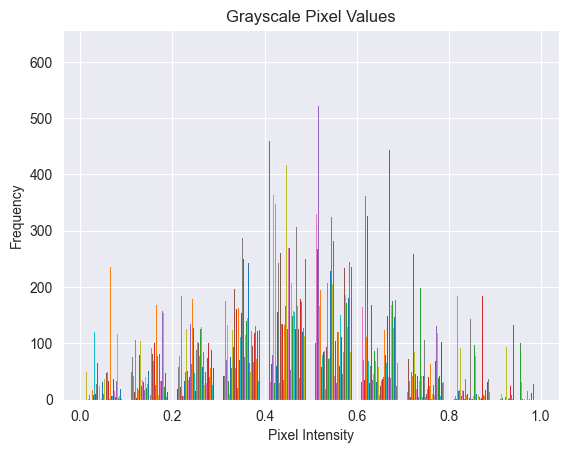

In [5]:
# Create a histogram with specified color
plt.hist(pixelData["image"], lw=0)

# Labeling x and y axes
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Title for the histogram
plt.title('Grayscale Pixel Values')

# EDA II, Data Distrubtion
Histrogram of all gray scale pixel data(like above) but broken down by class(bird species).

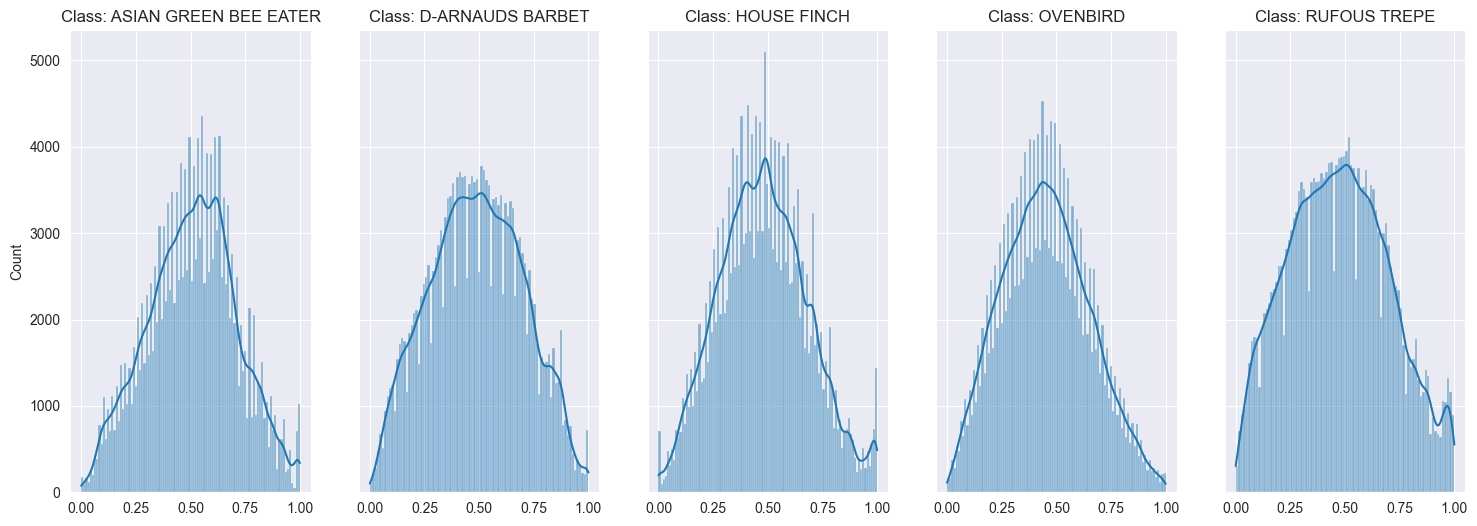

In [6]:
def EDA2(df):
    # show per label distrubtion
    classes = list(df['class'].unique())
    
    fig, axes = plt.subplots(1, len(classes), figsize=(18, 6), sharey=True)
    for i,clas in enumerate(classes):
        # get image data of the given class
        classData = df[df['class'] == clas]['image']
        # format the data for sns plotting
        flattened_data = np.concatenate(classData.values)
        # plot the data
        sns.histplot(flattened_data, ax=axes[i],  kde=True)
        axes[i].set_title(f'Class: {clas}')  # Set title for each subplot
EDA2(pixelData)


# EDA Results
It seems these are approx. normal distrubtion thus Guassian Naive Bayes is applicable.

# Logistic Regression Beyond this point

# logistic Regression
Modified for non-binary mutli-class.

In [51]:

class LogisticRegression:
    # softmax for multi-class(non-binary) classification
    # softmax is an extentsion of sigmoid(they are equivalent when working on binary case)
    def softmax(self,z):
        # more numerically stable form of softmax, by z - ... helps prevent overflow
        exp_scores = np.exp(z - np.max(z))
        probs = exp_scores / np.sum(exp_scores)
        return probs
    
    # TODO: Implement Multi-class cross-entropy function(likelihood est?).
    def cost_function(self, X, y, weights):                 
        z = np.dot(X, weights)
        predict_1 = y * np.log(self.sigmoid(z))
        predict_0 = (1 - y) * np.log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)

    # "fit" the weights to their best value within the given epochs(iterations).
    # could have this program run until weights become static in value
    # that may take awhile for little gain however, requires testing.
    def fit(self, X, y, num_classes=5, epochs=25, lr=0.05):

        # loss seems for after fact data collection, like how well 25 epochs worked, etc.
        loss = []
        # num feats = size of the first array in list X
        num_feats = len(X[0])
        
        # random weights more effective than init = 0 weights.
        weights = np.random.rand(num_feats, num_classes) 
    
        # number of data points(pixel values) in the dataset 
        N = len(X) * len(X[0])
        
        # create one-hot vectors with the answer labels
        # e.g. if image 1 is class 1, then 1-hot vec = [0, 1, 0, 0, 0]
        # first make it the correct shape
        one_hot_y = np.zeros((len(X),num_classes))
        # then set the apporiate cells to true based on answer labels
        one_hot_y[range(len(X)),y] = 1
        
        # epocs = iterations
        for _ in range(epochs):
            # go through the array list X, using each array a feature vector(X[i]).
            for i in range(len(X)): 
                # z = feature vec * weight vec
                z = np.dot(X[i], weights)
                # map to a probability with softmax cause multi-class
                y_hat = self.softmax(z)
                
                # calculated by  y_hat prediction vector - one_hot_y label vector. Each refering to a singluar array of pixel data
                error = y_hat - one_hot_y[i]
                # gradient descent
                # TODO: Fix errornd (5,) : shapes (784,) not aligned: 784 (dim 0) != 5 (dim 0)
                # PROBLEM: adding dummy rows/cols to allow tranpose to match dims is problematic.
                # Maybe this is the result of a prior error? Am I conceptionally wrong here, and this is a warning sign?
                # solution? Use likelihood estimation to cal the error instead???
        
                #gradient = np.outer(X[i].T, error)
                
                gradient = error / N
                
                # adjust weight
                weights -= lr * gradient
                # TODO: Break when weight is no longer changing.
                
                # Computing and storing the loss for this epoch
                # TODO: Figure out the loss function for softmax(I think it's likelihood function).
                #loss.append(self.cost_function(X[i], y, weights))

        # Storing the trained weights and loss values in the class attributes
        self.weights = weights
        self.loss = loss
        
    def predict(self, X):
        predictions = []
        # go through each feature vector x in feature vector list X, 
        for x in X:
            # use the fitted weight vector on the feature vector   
            z = np.dot(x, self.weights)
            # map to probability in mutli-class case
            probs = self.softmax(z)
            # Returning the class with highest probability
            predictions.append(np.argmax(probs))
        return predictions

# Plug and see

In [54]:
logreg = LogisticRegression()

# features (flatten array of 28 x 28 grayscale pixel values)
x_train = pixelData[pixelData['data set'] == 'train']['image'].tolist()
x_test = pixelData[pixelData['data set'] == 'test']['image'].tolist()
# labels, species labels to the given image
y_train = (pixelData[pixelData['data set'] == 'train']['class no'])
y_test = (pixelData[pixelData['data set'] == 'test']['class no'])
# flatten the y_train series into 1D numpyarray
y_train_labels_array = y_train.values


logreg.fit(x_train,y_train_labels_array)


y_pred = logreg.predict(x_test)

1197    0
1198    0
1199    0
1200    0
1201    0
1202    1
1203    1
1204    1
1205    1
1206    1
1207    2
1208    2
1209    2
1210    2
1211    2
1212    3
1213    3
1214    3
1215    3
1216    3
1217    4
1218    4
1219    4
1220    4
1221    4
Name: class no, dtype: int64


# Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# see how accurate the model is
print(classification_report(y_test, y_pred))
print('-'*55) # prints 55 dashes
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred,average='micro'))

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.10      0.20      0.13         5
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         5
           4       0.50      0.60      0.55         5

    accuracy                           0.24        25
   macro avg       0.35      0.24      0.23        25
weighted avg       0.34      0.24      0.23        25

-------------------------------------------------------
Confusion Matrix

[[1 4 0 0 0]
 [3 1 0 0 1]
 [1 3 1 0 0]
 [1 2 0 0 2]
 [2 0 0 0 3]]
0.24


c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,